<a href="https://colab.research.google.com/github/Randall19/Hello-World/blob/master/wild_plant_imagescrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install jmd-imagescraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -Uqq fastbook

In [ ]:
import fastbook
from fastbook import *
fastbook.setup_book()
from fastai.vision.widgets import *



In [ ]:
from jmd_imagescraper.core import *
from pathlib import Path
from jmd_imagescraper.imagecleaner import *

In [ ]:
wild_plant=['mushroom','lichen']
path=Path().cwd()/"wild_plant"

In [ ]:
duckduckgo_search(path, "mushroom", "mushrooms", max_results=100)

Duckduckgo search: mushrooms


[Path('/content/wild_plant/mushroom/101_cf85c637.jpg'),
 Path('/content/wild_plant/mushroom/102_057711ec.jpg'),
 Path('/content/wild_plant/mushroom/103_70134507.jpg'),
 Path('/content/wild_plant/mushroom/104_ffa3013b.jpg'),
 Path('/content/wild_plant/mushroom/105_2b6ede08.jpg'),
 Path('/content/wild_plant/mushroom/106_d33dfe78.jpg'),
 Path('/content/wild_plant/mushroom/107_3996d379.jpg'),
 Path('/content/wild_plant/mushroom/108_af825839.jpg'),
 Path('/content/wild_plant/mushroom/109_e3f28aa6.jpg'),
 Path('/content/wild_plant/mushroom/110_70fefbd8.jpg'),
 Path('/content/wild_plant/mushroom/111_0870ccd3.jpg'),
 Path('/content/wild_plant/mushroom/112_9afdfb40.jpg'),
 Path('/content/wild_plant/mushroom/113_02bcb756.jpg'),
 Path('/content/wild_plant/mushroom/114_26b0d0bc.jpg'),
 Path('/content/wild_plant/mushroom/115_e1d98bc6.jpg'),
 Path('/content/wild_plant/mushroom/116_a7d5a576.jpg'),
 Path('/content/wild_plant/mushroom/117_c14f3737.jpg'),
 Path('/content/wild_plant/mushroom/118_8ec5efd2

In [ ]:
duckduckgo_search(path, "lichen","lichens", max_results=100)

Duckduckgo search: lichens


[Path('/content/wild_plant/lichen/101_70bc38fc.jpg'),
 Path('/content/wild_plant/lichen/102_90283fa9.jpg'),
 Path('/content/wild_plant/lichen/103_59d1c3b1.jpg'),
 Path('/content/wild_plant/lichen/104_9c357a3e.jpg'),
 Path('/content/wild_plant/lichen/105_86e74030.jpg'),
 Path('/content/wild_plant/lichen/106_e162c4bd.jpg'),
 Path('/content/wild_plant/lichen/107_30425a87.jpg'),
 Path('/content/wild_plant/lichen/108_313d9222.jpg'),
 Path('/content/wild_plant/lichen/109_989e5877.jpg'),
 Path('/content/wild_plant/lichen/110_ac3da808.jpg'),
 Path('/content/wild_plant/lichen/111_b81d57d3.jpg'),
 Path('/content/wild_plant/lichen/112_69250373.jpg'),
 Path('/content/wild_plant/lichen/113_ceb4974a.jpg'),
 Path('/content/wild_plant/lichen/114_38266972.jpg'),
 Path('/content/wild_plant/lichen/115_9a7959ee.jpg'),
 Path('/content/wild_plant/lichen/116_d6399904.jpg'),
 Path('/content/wild_plant/lichen/117_b6a7e248.jpg'),
 Path('/content/wild_plant/lichen/118_f311d21e.jpg'),
 Path('/content/wild_plant/l

In [ ]:
path='/content/wild_plant/mushroom/'

In [ ]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [ ]:
path=Path().cwd()/"wild_plant"

In [ ]:
fns=get_image_files(path)
fns

(#400) [Path('/content/wild_plant/lichen/170_ce14cea8.jpg'),Path('/content/wild_plant/lichen/166_6fd86c2f.jpg'),Path('/content/wild_plant/lichen/099_94d490d8.jpg'),Path('/content/wild_plant/lichen/112_69250373.jpg'),Path('/content/wild_plant/lichen/117_b6a7e248.jpg'),Path('/content/wild_plant/lichen/165_1ea748c0.jpg'),Path('/content/wild_plant/lichen/059_2d9a4dad.jpg'),Path('/content/wild_plant/lichen/027_a15e1f0b.jpg'),Path('/content/wild_plant/lichen/071_4be5190a.jpg'),Path('/content/wild_plant/lichen/087_07e2a23c.jpg')...]

In [ ]:
failed=verify_images(fns)
failed

(#0) []

In [ ]:
rooms=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

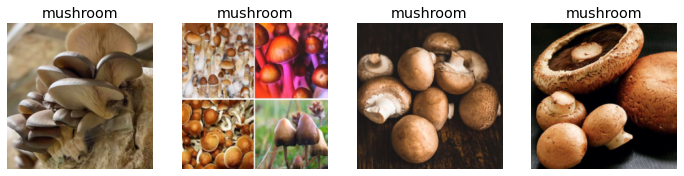

In [ ]:
dls=rooms.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

In [ ]:
wild_plant=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

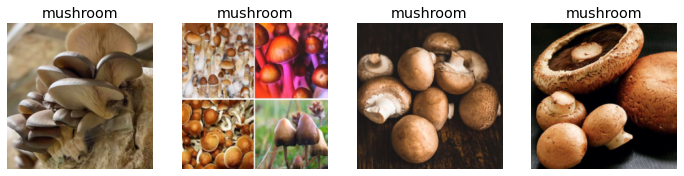

In [ ]:

dls=wild_plant.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate,)
learn.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.163531,0.483054,0.137500,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.201299,0.024466,0.000000,00:04
1,0.129271,0.002214,0.000000,00:03


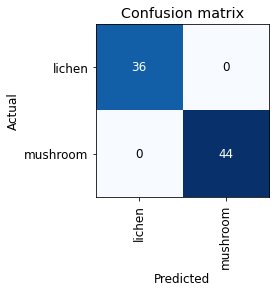

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

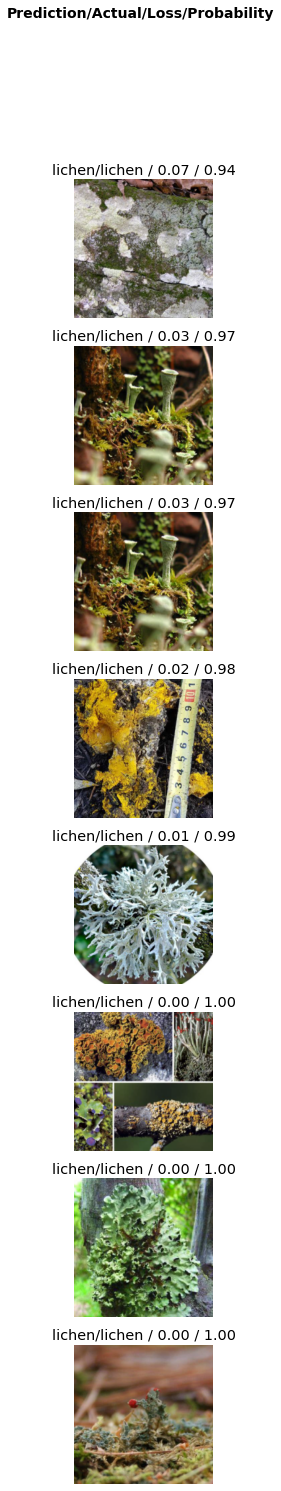

In [ ]:
interp.plot_top_losses(8,nrows=8)

In [ ]:
??interp.plot_top_losses





In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate,)
learn.fine_tune(9)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.046214,0.358554,0.112500,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.214247,0.101876,0.025000,00:04
1,0.156643,0.014623,0.000000,00:04
2,0.105002,0.000923,0.000000,00:04
3,0.076588,0.000807,0.000000,00:04
4,0.058444,0.000599,0.000000,00:05
5,0.047445,0.000261,0.000000,00:04
6,0.038880,0.000172,0.000000,00:04
7,0.032348,0.000143,0.000000,00:04
8,0.027492,0.000146,0.000000,00:04


In [ ]:
learn.export()
path=Path()
path.ls(file_exts='.pkl')
learn_inf=load_learner(path/'export.pkl')
btn_upload=widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img=PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl


Output()

In [ ]:
pred, pred_idx, probs = learn_inf.predict(img)
Ibl_pred = widgets.Label()
Ibl_pred.value =f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
Ibl_pred

Label(value='Prediction: mushroom; Probability: 1.0000')